In [38]:
# import yang dibutuhkan dalam pengolahan citra
import cv2 # untuk mengolah (menampilkan/ membaca citra dll)
import numpy as np # mengolah angka, matriks citra dll
import matplotlib.pyplot as plt # untuk mengolah (menampilkan/ membaca citra dll)

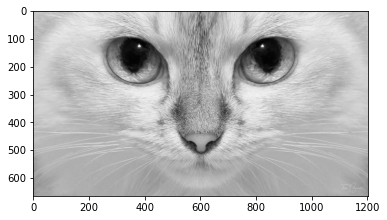

In [39]:
# membaca dan konversi citra dari RGB ke GRAY
image=cv2.imread("modul4.jpg") # baris code ini digunakan untuk membaca gambar dan menyimpannnya ke dalam variabel image
grayImage=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) # konversi image ke GRAY dari RGB dan menyimpannya dalam variabel baru (grayImage)
plt.imshow(grayImage,"gray") # menampilkan image yang sudah di konversi (grayImage) dengan color map gray

In [40]:
tinggi,lebar=grayImage.shape # mengambil dan menyimpan ukuran image dalam variabel tinggi dan lebar

low_filter=np.array([[0.7071067812,0.7071067812]]) # deklarasi low_filter kernel dekomposisi haar
high_filter=np.array([[-0.7071067812, 0.7071067812]]) # deklarasi high_filter kernel dekomposisi haar

In [41]:
#fungsi berikut untuk melakukan konvolusi pada sebuah image dengan kernel tertentu
def konvolusi(image,kernel):
    numberOfPadding=(max(kernel.shape)+1)/2 # banyaknya baris padding yang akan di tambahkan pada tiap sisi image
    newGrayImage=np.pad(image,int(numberOfPadding)) #menambahkan padding pada image dan menyimpannnya dalam matriks baru(newGrayImage)
    konv_noClip=np.zeros(image.shape) #menyiapkan sebuah matriks sebagai tempat untuk menyimpan hasil konvolusi tanpa clipping
    
    y,x=konv_noClip.shape #mengambil dan menyimpan nilai ukuran dari konv_noClip dan disimpan dalam variabel x dan y
    yKernel,xKernel=kernel.shape #mengambil dan menyimpan nilai ukuran dari kernel dan disimpan dalam variabel xKernel dan yKernel
    
    #perulangan dibawah ini digunakan untuk melakukan operasi konvolusi pada citra yang disediakan
    for i in range (y): #perulangan sebanyak y
        for j in range (x): #perulangan sebanyak x
            for k in range (yKernel): #perulangan sebanyak yKernel
                for l in range (xKernel): #perulangan sebanyak xKernel
                    konv_noClip[i][j] +=newGrayImage[i+k][j+l]*kernel[k][l] # menyimpan nilai konvolusi untuk tiap piksel
                    
    return konv_noClip #mengembalikan nilai konvolusi tanpa klipping

In [42]:
# melakukan proses down sampling untuk dengan mengambil pixel-pixel tertentu sehingga ukuran citra menjadi lebih kecil
def downSampling(image,step): # deklarasi nama function dan parameter input yang dibutuhkan untuk melakukan down sampling
    # jika input step -> 1, artinya akan dilakukan proses sampling terhadap kolom
    if step==1: 
        hasil=np.zeros((image.shape[0],int(image.shape[1]/2))) # membuat sebuah array nol dengan ukuran sesuai tinggi citra asli dan setengah lebarnya
        for x in range(image.shape[0]): # melakukan perulangan sebanyak tinggi image
            for y in range (int(image.shape[1]/2)): # perulangan sebanyak setengah lebar image
                hasil[x,y]=image[x,y*2] # proses down sampling dan menyimpannya ke dalam matriks yang sudah disiapkan
    else:
    # jika input step 2 maka akan dilakukan sampling terhasdap baris
        hasil=np.zeros((int(image.shape[0]/2),image.shape[1])) # membuat sebuah array nol dengan ukuran setengah tinggi citra asli dan sesuai lebarnya
        for x in range(int(image.shape[0]/2)):  # melakukan perulangan sebanyak setengah tinggi image
            for y in range (image.shape[1]): # melakukan perulangan sebanyak lebar image
                hasil[x,y]=image[x*2,y] # proses down sampling dan menyimpannya ke dalam matriks yang sudah disiapkan
    return hasil # mengembalikan nilai

In [43]:
# memanggil fungsi yang sudah di deklarasikan sebelumnya untuk melakaukan dekomposisi terhadap image dan
# untuk mendapatkan aproximate dari citra
konv=konvolusi(grayImage,low_filter)
down1=downSampling(konv,1)
transpose=low_filter.transpose()
konv2=konvolusi(down1,transpose)
LL=downSampling(konv2,2)
print(LL)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         189.00000001 373.50000001 ... 378.00000001 380.00000001
  378.50000001]
 [  0.         190.50000001 381.50000001 ... 386.00000001 388.50000001
  386.50000001]
 ...
 [  0.         147.00000001 294.00000001 ... 314.00000001 309.00000001
  303.00000001]
 [  0.         147.00000001 294.00000001 ... 315.00000001 310.50000001
  305.00000001]
 [  0.         147.00000001 294.00000001 ... 317.00000001 311.50000001
  307.00000001]]


In [44]:
# memanggil fungsi yang sudah di deklarasikan sebelumnya untuk melakaukan dekomposisi terhadap image dan
# untuk mendapatkan vertikal detail dari citra
konv=konvolusi(grayImage,high_filter)
down1=downSampling(konv,1)
transpose=low_filter.transpose()
konv2=konvolusi(down1,transpose)
HL=downSampling(konv2,2)
print(HL)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         189.00000001  -0.5        ...  -1.           1.
   -2.5       ]
 [  0.         190.50000001   0.5        ...  -1.           1.5
   -2.5       ]
 ...
 [  0.         147.00000001   0.         ...  -1.          -1.
   -1.        ]
 [  0.         147.00000001   0.         ...  -1.          -1.5
   -1.        ]
 [  0.         147.00000001   0.         ...  -1.          -1.5
   -1.        ]]


In [45]:
# memanggil fungsi yang sudah di deklarasikan sebelumnya untuk melakaukan dekomposisi terhadap image dan
# untuk mendapatkan horizontal detail dari citra
konv=konvolusi(grayImage,low_filter)
down1=downSampling(konv,1)
transpose=high_filter.transpose()
konv2=konvolusi(down1,transpose)
LH=downSampling(konv2,2)
print(LH)

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 1.  1.  0.5]
 [0.  0.5 3.5 ... 3.  3.5 3.5]
 ...
 [0.  0.  0.  ... 1.  0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]]


In [46]:
# memanggil fungsi yang sudah di deklarasikan sebelumnya untuk melakaukan dekomposisi terhadap image dan
# untuk mendapatkan diagonal detail dari citra
konv=konvolusi(grayImage,high_filter)
down1=downSampling(konv,1)
transpose=high_filter.transpose()
konv2=konvolusi(down1,transpose)
HH=downSampling(konv2,2)
print(HH)

[[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.5 ...  0.   0.  -0.5]
 [ 0.   0.5  0.5 ...  0.   0.5  0.5]
 ...
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.5  0. ]
 [ 0.   0.   0.  ...  0.  -0.5  0. ]]


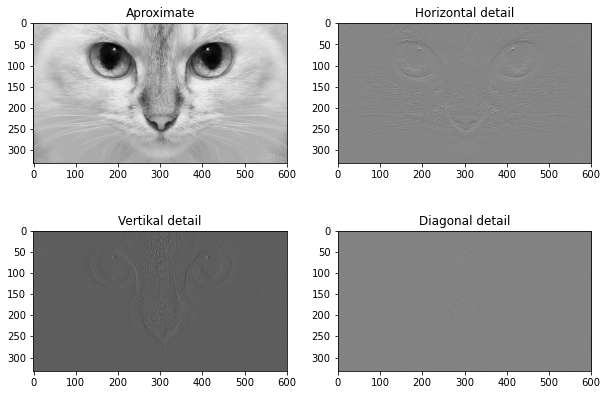

In [47]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.title("Aproximate")
plt.imshow(LL,"gray")
plt.subplot(222)
plt.title("Horizontal detail")
plt.imshow(LH,"gray")
plt.subplot(223)
plt.title("Vertikal detail")
plt.imshow(HL,"gray")
plt.subplot(224)
plt.title("Diagonal detail")
plt.imshow(HH,"gray")

In [48]:
# melakukan proses up sampling untuk dengan mengambil pixel-pixel tertentu dan memposisikannya pada posisi tertentu(memberi jarak)
def upSampling(image,step): # deklarasi nama function dan parameter input yang dibutuhkan untuk melakukan up sampling
    # jika input step -> 1, artinya akan dilakukan proses up sampling terhadap baris
    if step==1: 
        hasil=np.zeros((image.shape[0]*2,image.shape[1])) # membuat sebuah array nol dengan ukuran dua kali tinggi citra asli dan sesuai lebarnya
        for x in range(image.shape[0]): # melakukan perulangan sebanyak tinggi image
            for y in range (image.shape[1]): # perulangan sebanyak lebar image
                hasil[x*2,y]=image[x,y] # proses up sampling dan menyimpannya ke dalam matriks yang sudah disiapkan
    else:
    # jika input step 2 maka akan dilakukan up sampling terhadap kolom
        hasil=np.zeros((image.shape[0],image.shape[1]*2)) # membuat sebuah array nol dengan ukuran sesuai tinggi citra asli dan dua kali lebarnya
        for x in range(int(image.shape[0])):  # melakukan perulangan sebanyak tinggi image
            for y in range (image.shape[1]): # melakukan perulangan sebanyak lebar image
                hasil[x,y*2]=image[x,y] # proses up sampling dan menyimpannya ke dalam matriks yang sudah disiapkan
    return hasil # mengembalikan nilai

In [49]:
# memanggil fungsi yang sudah di deklarasikan sebelumnya untuk melakaukan pemrosesan terhadap LL
up1=upSampling(LL,1)
konv=konvolusi(up1,low_filter)
us2=upSampling(konv,2)
transpose=low_filter.transpose()
Hasil_LL=konvolusi(us2,transpose)
print(Hasil_LL)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 312.75000002   0.
  307.75000002]
 [  0.           0.           0.         ... 312.75000002   0.
  307.75000002]
 [  0.           0.           0.         ... 314.25000002   0.
  309.25000002]]


In [50]:
# memanggil fungsi yang sudah di deklarasikan sebelumnya untuk melakaukan pemrosesan terhadap HL
up1=upSampling(LH,1)
konv=konvolusi(up1,high_filter)
us2=upSampling(konv,2)
transpose=low_filter.transpose()
Hasil_LH=konvolusi(us2,transpose)
print(Hasil_LH)

[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.25  0.   -0.25]
 [ 0.    0.    0.   ...  0.25  0.   -0.25]
 [ 0.    0.    0.   ...  0.25  0.   -0.25]]


In [51]:
# memanggil fungsi yang sudah di deklarasikan sebelumnya untuk melakaukan pemrosesan terhadap HL
up1=upSampling(HL,1)
konv=konvolusi(up1,low_filter)
us2=upSampling(konv,2)
transpose=high_filter.transpose()
Hasil_HL=konvolusi(us2,transpose)
print(Hasil_HL)

[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -1.25  0.   -1.25]
 [ 0.    0.    0.   ...  1.25  0.    1.25]
 [ 0.    0.    0.   ... -1.25  0.   -1.25]]


In [52]:
# memanggil fungsi yang sudah di deklarasikan sebelumnya untuk melakaukan pemrosesan terhadap HH
up1=upSampling(LL,1)
konv=konvolusi(up1,high_filter)
us2=upSampling(konv,2)
transpose=high_filter.transpose()
Hasil_HH=konvolusi(us2,transpose)
print(Hasil_HH)

[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -2.25  0.   -2.75]
 [ 0.    0.    0.   ...  2.25  0.    2.75]
 [ 0.    0.    0.   ... -2.75  0.   -2.25]]


In [53]:
# function berikut digunakan untuk melakukan penggabungan dari hasil-hasil proses sebelumnya
def rekonstruksi(img1,img2,img3,img4): # deklarasi namaa fungsi dan parameter yang dibutuhkan (ukuran semua image harus sama)
    hasil=np.zeros(img1.shape) # membuat sebauh matriks numpy nol untuk menyimpan hasil rekonstruksi 
    for i in range (img1.shape[0]): #perulangan sebanyak baris image
        for j in range(img1.shape[1]): # perulangan sebnyak kolom image
            hasil[i,j]=img1[i,j]+img2[i,j]+img3[i,j]+img4[i,j] # menjumlahkan pixel yang bersesuaian dari keempat image
    return hasil

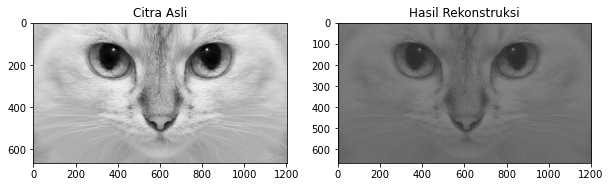

In [54]:
#menampilkan gambar dan meata letak
hasil=rekonstruksi(Hasil_LL,Hasil_LH,Hasil_HL,Hasil_HH)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Citra Asli")
plt.imshow(grayImage,"gray")
plt.subplot(122)
plt.title("Hasil Rekonstruksi")
plt.imshow(hasil,"gray")